<a href="https://colab.research.google.com/github/Vishnu-77-cpu/Handwriting-Prediction-/blob/main/PRCP_1002_HandwrittenDigits_Complete_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✍️ Handwriting Prediction & Digit Recognition Project  
*Exploratory Data Analysis (EDA) & Classification-Based Machine Learning Project*

---

## 📝 Problem Statement

**Task 1:** Perform exploratory data analysis (EDA) on the handwritten digit dataset.  
**Task 2:** Build machine learning models to classify handwritten digits.  
**Task 3:** Evaluate model performance and identify the best classification model.

---

## 🏛️ Submission Details

### 📤 Submitted To:
**DataMites Internship Team**

### ✍️ Prepared By:
**Vishnu K**  
**NaveenKumar K**

### 📅 Date:
**December 2025**

---

## 🎯 Project Overview

This project analyzes a **Handwritten Digit Dataset** to understand digit patterns and classify handwritten numbers using machine learning techniques.

By performing **Exploratory Data Analysis (EDA)** and applying **Classification Algorithms (Supervised Machine Learning)**, we aim to:

- Understand pixel-level patterns of handwritten digits  
- Visualize digit distribution and image samples  
- Convert image data into numerical features  
- Train classification models for digit prediction  
- Evaluate and compare model performance  
- Build a reliable handwriting digit recognition system  

---

## 🧩 Dataset Source & Dataset Description

📊 **Dataset Name:**  
Handwritten Digits Dataset

🧠 **Provided By:**  
Scikit-learn / MNIST Dataset

📅 **Duration:**  
Handwritten digit samples (0–9)

---

- The dataset contains images of handwritten digits from **0 to 9**
- Each image is represented using **pixel intensity values**
- Images are grayscale and converted into numerical format
- The dataset is suitable for **classification and pattern recognition** tasks

---

## 📄 Dataset Description Table

| Category | Description | Example |
|--------|-------------|---------|
| Digit | Actual handwritten number | 5 |
| Image Size | Dimension of digit image | 8×8 / 28×28 |
| Pixel Values | Grayscale intensity | 0–255 |
| Total Features | Number of pixels | 64 / 784 |
| Data Type | Numerical | Integer |
| Target Variable | Digit class | 0–9 |

---

## 🧰 Tools & Libraries

| Category | Libraries | Purpose |
|--------|----------|---------|
| Data Handling | pandas, numpy | Data loading & manipulation |
| Visualization | matplotlib, seaborn | Image visualization & EDA |
| Modeling | scikit-learn | Classification algorithms |
| Preprocessing | StandardScaler | Feature scaling |
| Evaluation | accuracy_score, confusion_matrix | Model evaluation |


## 1. Import Required Libraries

In [ ]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow/Keras for loading MNIST dataset (as per project requirements)
from tensorflow.keras.datasets import mnist

# Machine Learning models and utilities
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Classification Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Neural Network
from sklearn.neural_network import MLPClassifier

# Utilities
import warnings
import time
from datetime import datetime

# Ignore all warnings to keep output clean
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("All libraries imported successfully!")
print(f"Analysis started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

All libraries imported successfully!
Analysis started at: 2026-02-09 11:33:29


---
## TASK 1: Complete Data Analysis Report
---

### 1.1 Load the MNIST Dataset

In [ ]:
print("Loading MNIST dataset using TensorFlow/Keras...")
print("This may take a few minutes on first run...\n")

# Load MNIST dataset from TensorFlow/Keras (as per project requirements)
# Source: from tensorflow.keras.datasets import mnist
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

print("Dataset loaded successfully!")
print(f"\nOriginal split provided by Keras:")
print(f"  Training set: {x_train_original.shape[0]:,} samples")
print(f"  Test set: {x_test_original.shape[0]:,} samples")
print(f"  Total samples: {x_train_original.shape[0] + x_test_original.shape[0]:,}")

# Combine train and test for unified analysis
# We'll resplit later for our models
X = np.concatenate([x_train_original, x_test_original], axis=0)
y = np.concatenate([y_train_original, y_test_original], axis=0)

# Reshape from (samples, 28, 28) to (samples, 784)
X = X.reshape(X.shape[0], -1)

print(f"\nAfter combining and reshaping:")
print(f"  Total samples: {X.shape[0]:,}")
print(f"  Features per sample: {X.shape[1]} (28x28 pixels flattened)")
print(f"  Image dimensions: 28 x 28 pixels")
print(f"  Number of classes: {len(np.unique(y))} (digits 0-9)")

Loading MNIST dataset using TensorFlow/Keras...
This may take a few minutes on first run...

Dataset loaded successfully!

Original split provided by Keras:
  Training set: 60,000 samples
  Test set: 10,000 samples
  Total samples: 70,000

After combining and reshaping:
  Total samples: 70,000
  Features per sample: 784 (28x28 pixels flattened)
  Image dimensions: 28 x 28 pixels
  Number of classes: 10 (digits 0-9)


### 1.2 Dataset Overview and Basic Statistics

In [ ]:
# Data is already in numpy array format from Keras
X_array = X.astype(np.float32)
y_array = y.astype(np.int32)

print("="*60)
print("DATASET OVERVIEW")
print("="*60)

print(f"\n1. Shape Information:")
print(f"   - X (Features) shape: {X_array.shape}")
print(f"   - y (Labels) shape: {y_array.shape}")
print(f"   - Image dimensions: 28 x 28 pixels")

print(f"\n2. Data Types:")
print(f"   - Features (X): {X_array.dtype}")
print(f"   - Labels (y): {y_array.dtype}")

print(f"\n3. Pixel Value Range:")
print(f"   - Minimum: {X_array.min()}")
print(f"   - Maximum: {X_array.max()}")
print(f"   - Mean: {X_array.mean():.2f}")
print(f"   - Standard Deviation: {X_array.std():.2f}")

print(f"\n4. Label Distribution:")
print(f"   - Unique labels: {np.unique(y_array)}")
print(f"   - Label range: {y_array.min()} to {y_array.max()}")

print(f"\n5. Memory Usage:")
print(f"   - Features: {X_array.nbytes / (1024**2):.2f} MB")
print(f"   - Labels: {y_array.nbytes / (1024**2):.2f} MB")

DATASET OVERVIEW

1. Shape Information:
   - X (Features) shape: (70000, 784)
   - y (Labels) shape: (70000,)
   - Image dimensions: 28 x 28 pixels

2. Data Types:
   - Features (X): float32
   - Labels (y): int32

3. Pixel Value Range:
   - Minimum: 0.0
   - Maximum: 255.0
   - Mean: 33.39
   - Standard Deviation: 78.65

4. Label Distribution:
   - Unique labels: [0 1 2 3 4 5 6 7 8 9]
   - Label range: 0 to 9

5. Memory Usage:
   - Features: 209.35 MB
   - Labels: 0.27 MB


### 1.3 Class Distribution Analysis


CLASS DISTRIBUTION:
 Digit  Count  Percentage
     0   6903        9.86
     1   7877       11.25
     2   6990        9.99
     3   7141       10.20
     4   6824        9.75
     5   6313        9.02
     6   6876        9.82
     7   7293       10.42
     8   6825        9.75
     9   6958        9.94


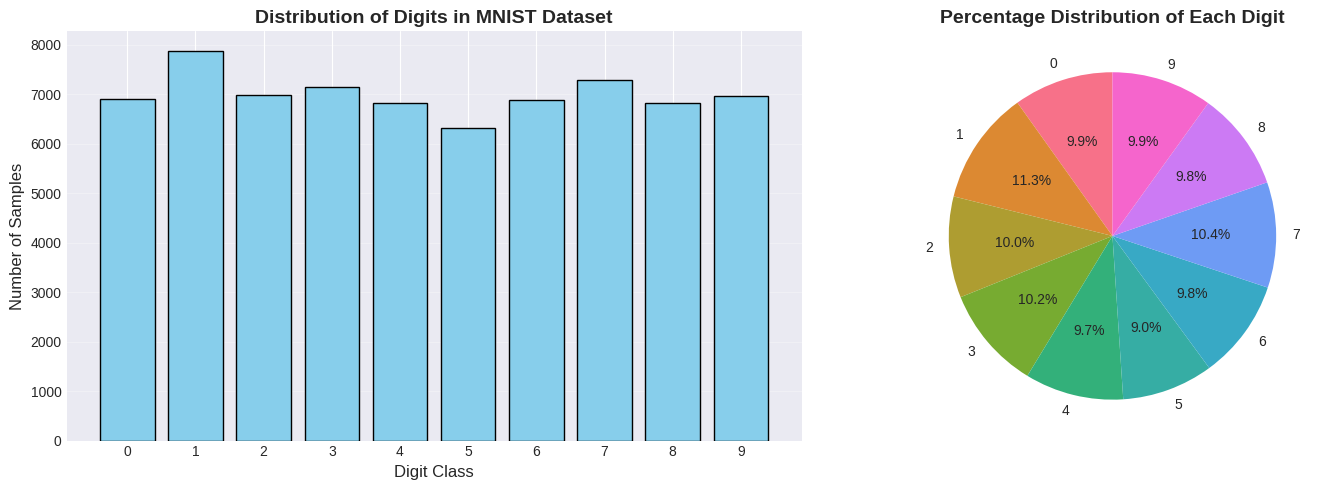


📊 Class Balance Analysis:
   - Most frequent digit: 1 (7877 samples)
   - Least frequent digit: 5 (6313 samples)
   - Imbalance ratio: 1.25
   ✅ Dataset is well-balanced!


In [ ]:
# Count samples per class
unique, counts = np.unique(y_array, return_counts=True)
class_distribution = pd.DataFrame({
    'Digit': unique,
    'Count': counts,
    'Percentage': (counts / len(y_array) * 100).round(2)
})

print("\nCLASS DISTRIBUTION:")
print(class_distribution.to_string(index=False))

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
axes[0].bar(class_distribution['Digit'], class_distribution['Count'], color='skyblue', edgecolor='black')
axes[0].set_xlabel('Digit Class', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Distribution of Digits in MNIST Dataset', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(10))
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(class_distribution['Count'], labels=class_distribution['Digit'], autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('husl', 10))
axes[1].set_title('Percentage Distribution of Each Digit', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
max_count = class_distribution['Count'].max()
min_count = class_distribution['Count'].min()
imbalance_ratio = max_count / min_count

print(f"\n📊 Class Balance Analysis:")
print(f"   - Most frequent digit: {class_distribution.loc[class_distribution['Count'].idxmax(), 'Digit']} ({max_count} samples)")
print(f"   - Least frequent digit: {class_distribution.loc[class_distribution['Count'].idxmin(), 'Digit']} ({min_count} samples)")
print(f"   - Imbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio < 1.5:
    print(f"   ✅ Dataset is well-balanced!")
else:
    print(f"   ⚠️ Dataset shows some imbalance")

### 1.4 Sample Images Visualization

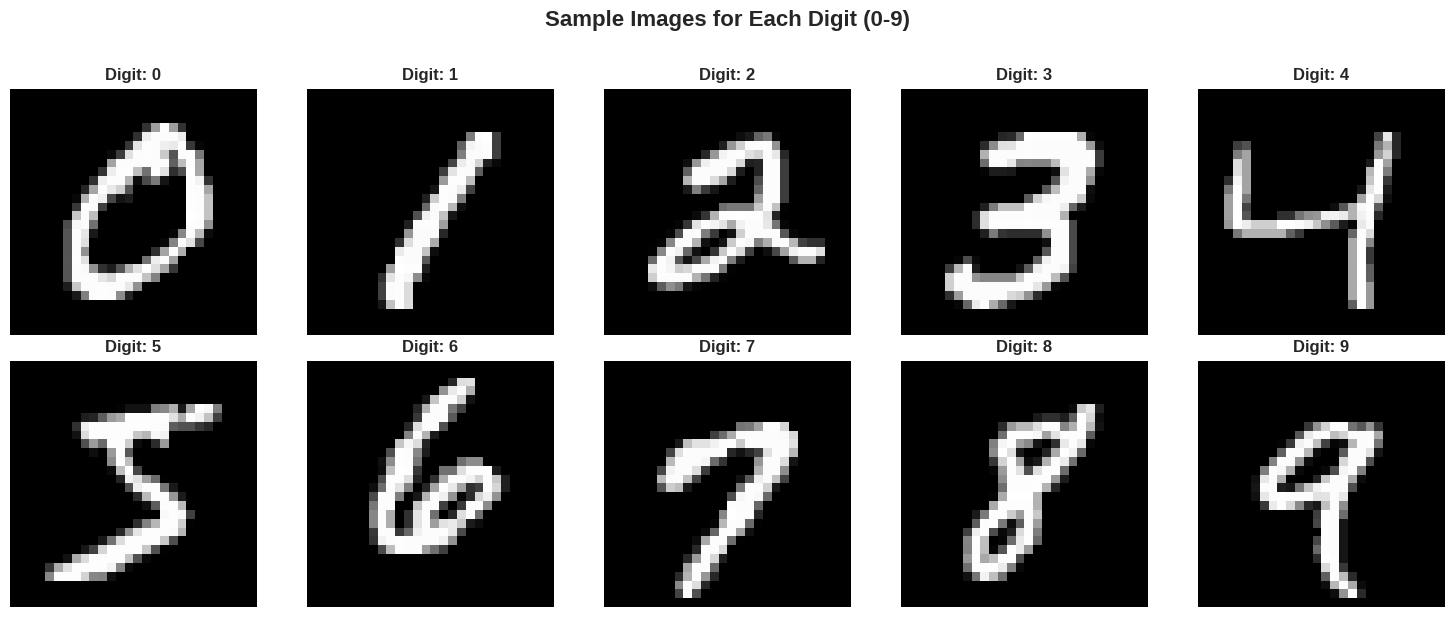

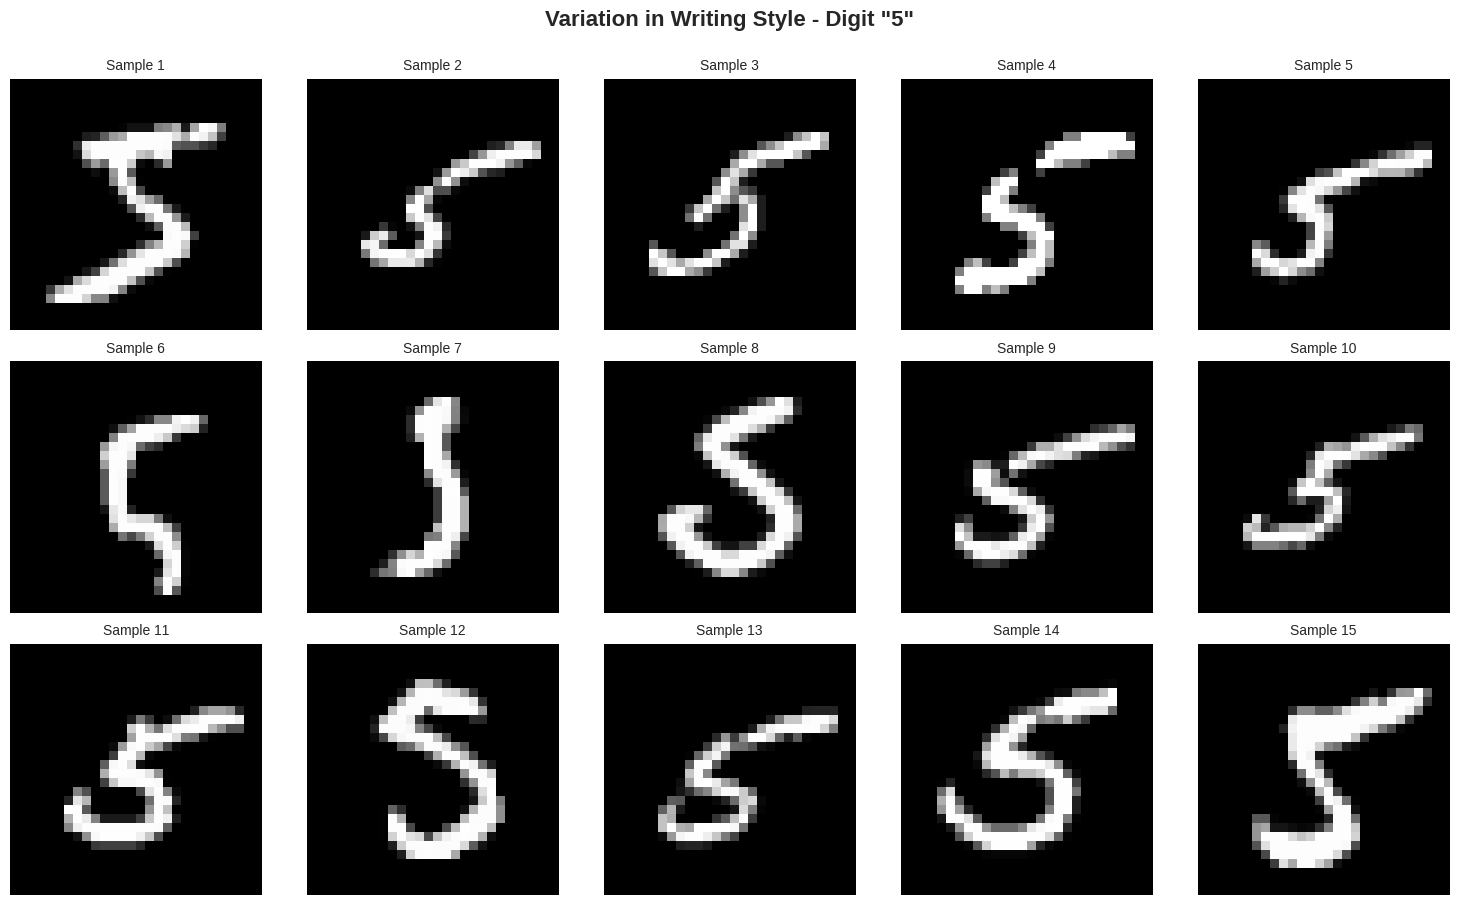

In [ ]:
# Display sample images for each digit
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for digit in range(10):
    # Find first occurrence of each digit
    idx = np.where(y_array == digit)[0][0]
    image = X_array[idx].reshape(28, 28)

    axes[digit].imshow(image, cmap='gray')
    axes[digit].set_title(f'Digit: {digit}', fontsize=12, fontweight='bold')
    axes[digit].axis('off')

plt.suptitle('Sample Images for Each Digit (0-9)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Display multiple samples of a single digit
sample_digit = 5
digit_indices = np.where(y_array == sample_digit)[0][:15]

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.ravel()

for i, idx in enumerate(digit_indices):
    image = X_array[idx].reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Sample {i+1}', fontsize=10)
    axes[i].axis('off')

plt.suptitle(f'Variation in Writing Style - Digit "{sample_digit}"', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 1.5 Pixel Intensity Analysis

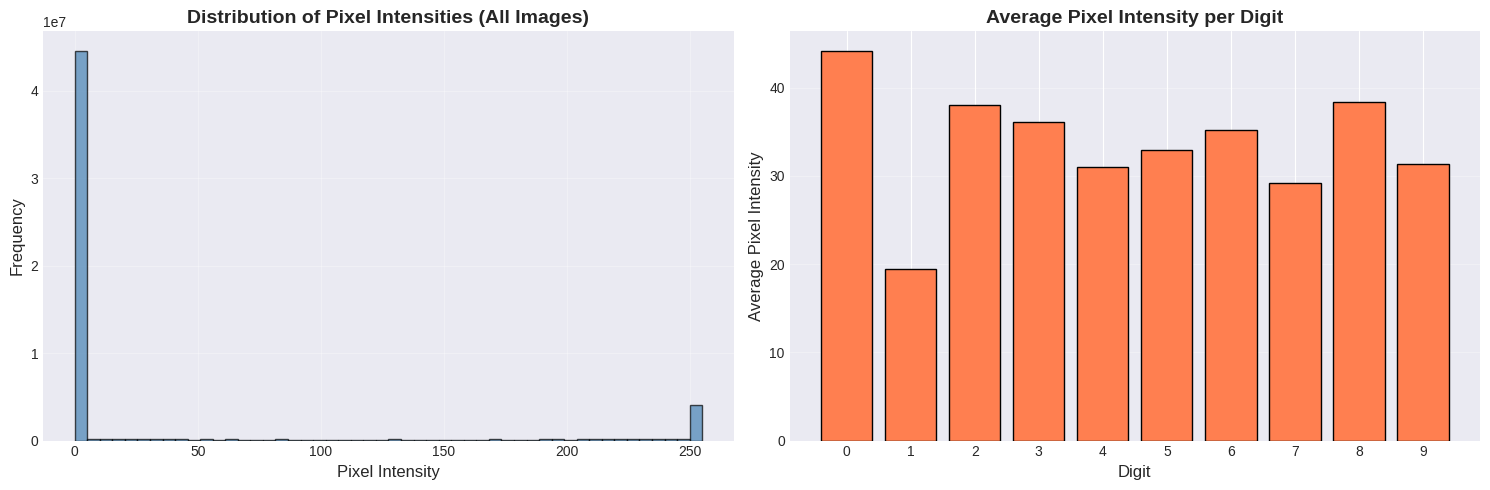


📈 Pixel Intensity Insights:
   - Most pixels are at intensity 0 (black background)
   - Written digits have pixel values ranging from 0 to 255
   - Average intensities vary slightly between digits


In [ ]:
# Analyze pixel intensity distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall pixel intensity distribution
axes[0].hist(X_array.flatten(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Pixel Intensity', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Pixel Intensities (All Images)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Average pixel intensity per digit
avg_intensity_per_digit = []
for digit in range(10):
    digit_samples = X_array[y_array == digit]
    avg_intensity_per_digit.append(digit_samples.mean())

axes[1].bar(range(10), avg_intensity_per_digit, color='coral', edgecolor='black')
axes[1].set_xlabel('Digit', fontsize=12)
axes[1].set_ylabel('Average Pixel Intensity', fontsize=12)
axes[1].set_title('Average Pixel Intensity per Digit', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(10))
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📈 Pixel Intensity Insights:")
print(f"   - Most pixels are at intensity 0 (black background)")
print(f"   - Written digits have pixel values ranging from 0 to 255")
print(f"   - Average intensities vary slightly between digits")

### 1.6 Missing Values and Data Quality Check

DATA QUALITY CHECKS

1. Missing Values:
   - Features (X): 0 missing values
   - Labels (y): 0 missing values

2. Duplicate Samples:
   - Number of duplicate images: 0

3. Feature Variance:
   - Features with zero variance: 65
   - These are pixels that are always the same (likely edges)


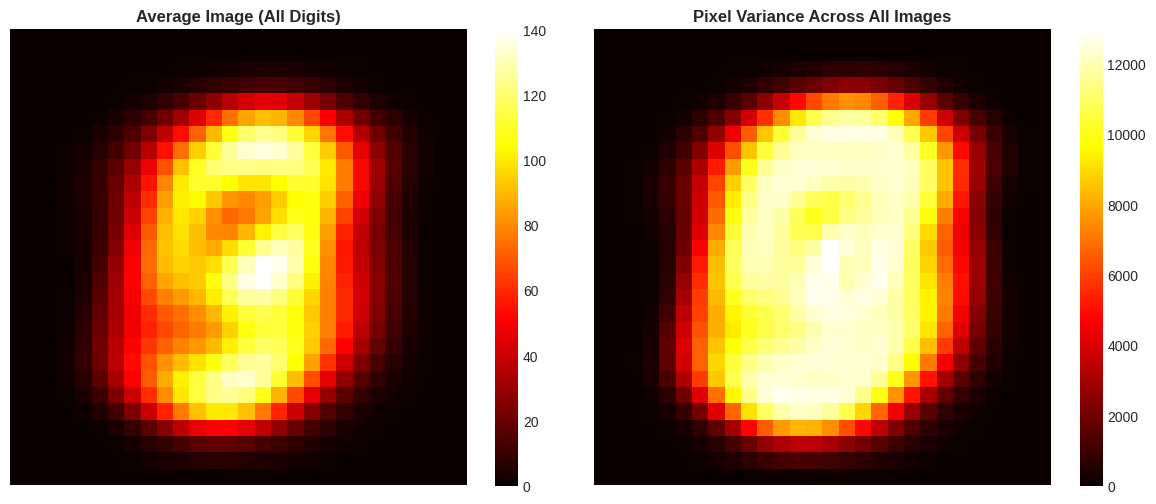


✅ Data Quality Summary:
   - No missing values detected
   - Dataset is clean and ready for modeling


In [ ]:
print("="*60)
print("DATA QUALITY CHECKS")
print("="*60)

# Check for missing values
print(f"\n1. Missing Values:")
print(f"   - Features (X): {np.isnan(X_array).sum()} missing values")
print(f"   - Labels (y): {np.isnan(y_array).sum()} missing values")

# Check for duplicates
print(f"\n2. Duplicate Samples:")
unique_samples = np.unique(X_array, axis=0)
duplicates = X_array.shape[0] - unique_samples.shape[0]
print(f"   - Number of duplicate images: {duplicates}")

# Check for constant features
print(f"\n3. Feature Variance:")
feature_variance = X_array.var(axis=0)
zero_variance_features = np.sum(feature_variance == 0)
print(f"   - Features with zero variance: {zero_variance_features}")
print(f"   - These are pixels that are always the same (likely edges)")

# Visualize average digit and variance
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Average image across all samples
avg_image = X_array.mean(axis=0).reshape(28, 28)
im1 = axes[0].imshow(avg_image, cmap='hot')
axes[0].set_title('Average Image (All Digits)', fontsize=12, fontweight='bold')
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0])

# Variance across pixels
var_image = feature_variance.reshape(28, 28)
im2 = axes[1].imshow(var_image, cmap='hot')
axes[1].set_title('Pixel Variance Across All Images', fontsize=12, fontweight='bold')
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

print(f"\n✅ Data Quality Summary:")
print(f"   - No missing values detected")
print(f"   - Dataset is clean and ready for modeling")

### 1.7 Data Preprocessing

In [ ]:
print("Preparing data for modeling...\n")

# Use a subset for faster training (you can use full dataset for final model)
# For demonstration, we'll use 10,000 samples
# Change sample_size to 70000 to use full dataset
sample_size = 10000

np.random.seed(42)
indices = np.random.choice(len(X_array), sample_size, replace=False)
X_sample = X_array[indices]
y_sample = y_array[indices]

print(f"Using {sample_size:,} samples for training and testing")
print("Note: You can increase this to 70,000 for better results (will take longer)\n")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)

print(f"Training set size: {X_train.shape[0]:,} samples")
print(f"Test set size: {X_test.shape[0]:,} samples")

# Normalize pixel values to 0-1 range
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

print(f"\n✅ Data normalized to [0, 1] range")
print(f"✅ Train-test split completed")

Preparing data for modeling...

Using 10,000 samples for training and testing
Note: You can increase this to 70,000 for better results (will take longer)

Training set size: 8,000 samples
Test set size: 2,000 samples

✅ Data normalized to [0, 1] range
✅ Train-test split completed


---
## TASK 2: Build and Train Classification Models
---

### 2.1 Define Models to Compare

In [ ]:
print("="*60)
print("INITIALIZING CLASSIFICATION MODELS")
print("="*60)

# Dictionary of models to compare (defined directly in the training cell now)

print(f"\nTotal models to evaluate: 7\n") # Hardcoded count as the dict is now elsewhere
print("1. K-Nearest Neighbors")
print("2. Support Vector Machine")
print("3. Decision Tree")
print("4. Random Forest")
print("5. Logistic Regression")
print("6. Naive Bayes")
print("7. Neural Network (MLP)")

INITIALIZING CLASSIFICATION MODELS

Total models to evaluate: 7

1. K-Nearest Neighbors
2. Support Vector Machine
3. Decision Tree
4. Random Forest
5. Logistic Regression
6. Naive Bayes
7. Neural Network (MLP)


### 2.2 Train and Evaluate Models

In [ ]:
# Dictionary of models to compare
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Support Vector Machine': SVC(kernel='rbf', gamma='scale', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=20),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Neural Network (MLP)': MLPClassifier(hidden_layer_sizes=(128, 64),
                                          max_iter=150,
                                          random_state=42,
                                          early_stopping=True)
}

# Store results
results = []

print("\n" + "="*60)
print("TRAINING AND EVALUATING MODELS")
print("="*60 + "\n")

for model_name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {model_name}")
    print(f"{'='*60}")

    # Train the model
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Make predictions
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    prediction_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (s)': training_time,
        'Prediction Time (s)': prediction_time
    })

    # Print results
    print(f"\n✅ Training completed in {training_time:.2f} seconds")
    print(f"\n📊 Performance Metrics:")
    print(f"   - Accuracy:  {accuracy*100:.2f}%")
    print(f"   - Precision: {precision*100:.2f}%")
    print(f"   - Recall:    {recall*100:.2f}%")
    print(f"   - F1-Score:  {f1*100:.2f}%")
    print(f"\n⏱️  Prediction time: {prediction_time:.4f} seconds for {len(y_test)} samples")

print("\n" + "="*60)
print("ALL MODELS TRAINED SUCCESSFULLY!")
print("="*60)


TRAINING AND EVALUATING MODELS


Training: K-Nearest Neighbors

✅ Training completed in 0.01 seconds

📊 Performance Metrics:
   - Accuracy:  94.00%
   - Precision: 94.09%
   - Recall:    94.00%
   - F1-Score:  93.96%

⏱️  Prediction time: 0.9805 seconds for 2000 samples

Training: Support Vector Machine

✅ Training completed in 6.77 seconds

📊 Performance Metrics:
   - Accuracy:  95.15%
   - Precision: 95.15%
   - Recall:    95.15%
   - F1-Score:  95.15%

⏱️  Prediction time: 6.7518 seconds for 2000 samples

Training: Decision Tree

✅ Training completed in 2.12 seconds

📊 Performance Metrics:
   - Accuracy:  78.35%
   - Precision: 78.36%
   - Recall:    78.35%
   - F1-Score:  78.31%

⏱️  Prediction time: 0.0028 seconds for 2000 samples

Training: Random Forest

✅ Training completed in 6.17 seconds

📊 Performance Metrics:
   - Accuracy:  93.75%
   - Precision: 93.74%
   - Recall:    93.75%
   - F1-Score:  93.73%

⏱️  Prediction time: 0.0790 seconds for 2000 samples

Training: Logistic 

---
## TASK 3: Model Comparison and Best Model Selection
---

### 3.1 Comprehensive Model Comparison

In [ ]:
# Create comparison dataframe
results_df = pd.DataFrame(results)
results_df = results_df.round(4)

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80 + "\n")
print(results_df.to_string(index=False))

# Find best model
best_model_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_accuracy = results_df.loc[best_model_idx, 'Accuracy']

print(f"\n\n🏆 BEST MODEL: {best_model_name}")
print(f"   - Accuracy: {best_accuracy*100:.2f}%")
print(f"   - F1-Score: {results_df.loc[best_model_idx, 'F1-Score']*100:.2f}%")


MODEL COMPARISON SUMMARY

                 Model  Accuracy  Precision  Recall  F1-Score  Training Time (s)  Prediction Time (s)
   K-Nearest Neighbors    0.9400     0.9409  0.9400    0.9396             0.0057               0.9805
Support Vector Machine    0.9515     0.9515  0.9515    0.9515             6.7696               6.7518
         Decision Tree    0.7835     0.7836  0.7835    0.7831             2.1159               0.0028
         Random Forest    0.9375     0.9374  0.9375    0.9373             6.1652               0.0790
   Logistic Regression    0.8970     0.8970  0.8970    0.8967            12.2734               0.0126
           Naive Bayes    0.6015     0.6937  0.6015    0.5720             0.0955               0.0955
  Neural Network (MLP)    0.9455     0.9461  0.9455    0.9456             7.5118               0.0116


🏆 BEST MODEL: Support Vector Machine
   - Accuracy: 95.15%
   - F1-Score: 95.15%


### 3.2 Visual Comparison of Models

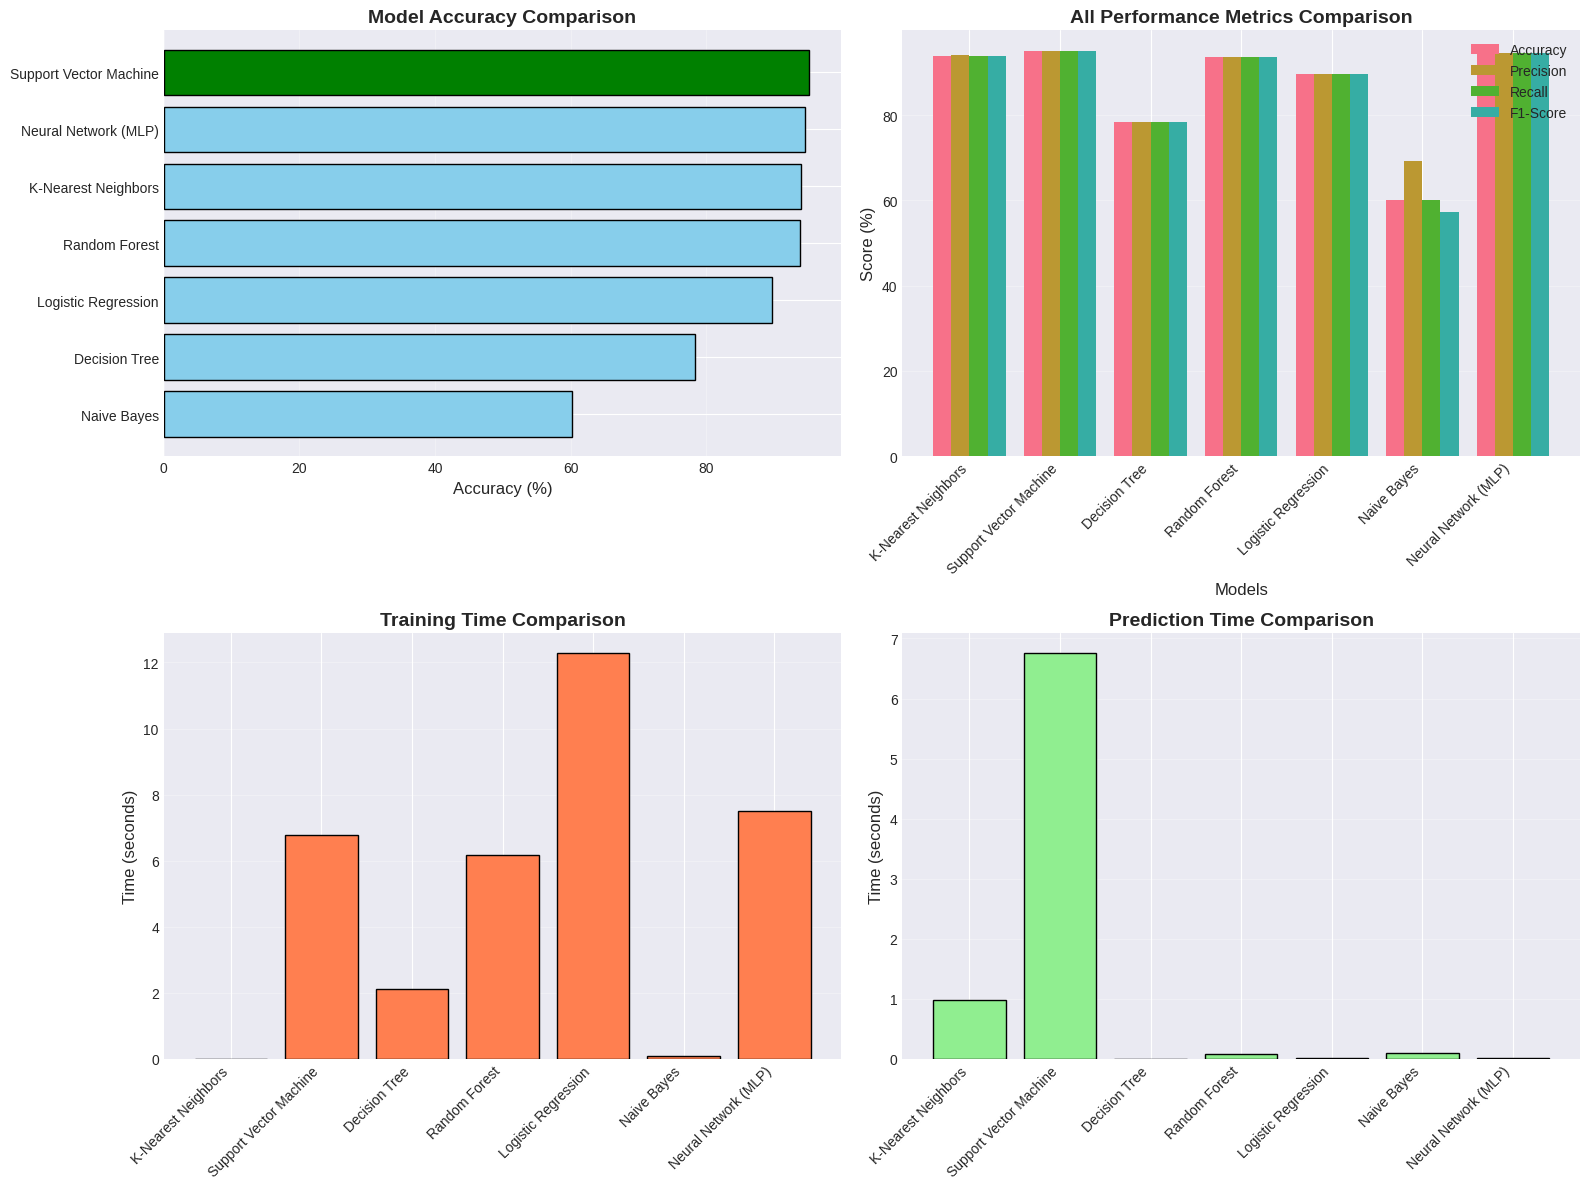

In [ ]:
# Accuracy comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy comparison
results_df_sorted = results_df.sort_values('Accuracy', ascending=True)
colors = ['green' if x == best_model_name else 'skyblue' for x in results_df_sorted['Model']]
axes[0, 0].barh(results_df_sorted['Model'], results_df_sorted['Accuracy']*100, color=colors, edgecolor='black')
axes[0, 0].set_xlabel('Accuracy (%)', fontsize=12)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. All metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(results_df))
width = 0.2

for i, metric in enumerate(metrics):
    axes[0, 1].bar(x_pos + i*width, results_df[metric]*100, width, label=metric)

axes[0, 1].set_xlabel('Models', fontsize=12)
axes[0, 1].set_ylabel('Score (%)', fontsize=12)
axes[0, 1].set_title('All Performance Metrics Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x_pos + width*1.5)
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Training time comparison
axes[1, 0].bar(results_df['Model'], results_df['Training Time (s)'], color='coral', edgecolor='black')
axes[1, 0].set_ylabel('Time (seconds)', fontsize=12)
axes[1, 0].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Prediction time comparison
axes[1, 1].bar(results_df['Model'], results_df['Prediction Time (s)'], color='lightgreen', edgecolor='black')
axes[1, 1].set_ylabel('Time (seconds)', fontsize=12)
axes[1, 1].set_title('Prediction Time Comparison', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Detailed Analysis of Best Model

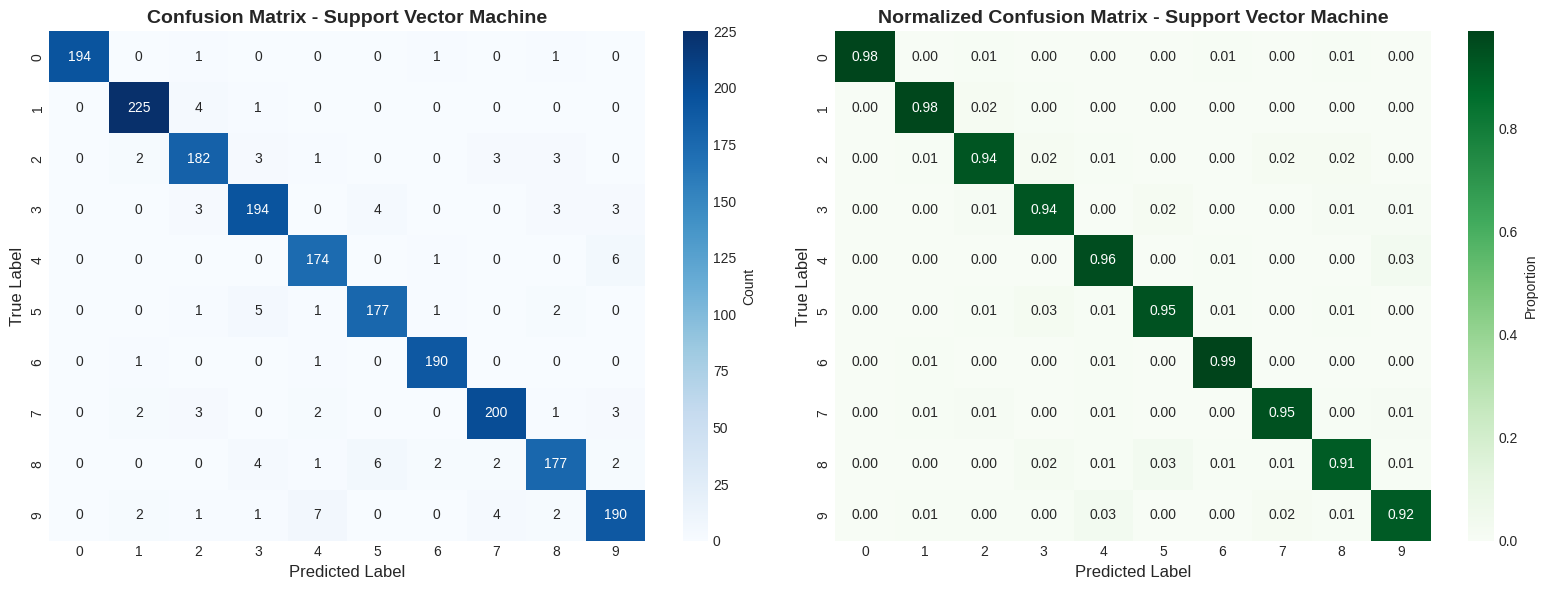


DETAILED CLASSIFICATION REPORT - Support Vector Machine

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       197
           1       0.97      0.98      0.97       230
           2       0.93      0.94      0.94       194
           3       0.93      0.94      0.93       207
           4       0.93      0.96      0.95       181
           5       0.95      0.95      0.95       187
           6       0.97      0.99      0.98       192
           7       0.96      0.95      0.95       211
           8       0.94      0.91      0.92       194
           9       0.93      0.92      0.92       207

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [ ]:
# Get the best model
best_model = models[best_model_name]

# Predictions from best model
y_pred_best = best_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens', ax=axes[1], cbar_kws={'label': 'Proportion'})
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_title(f'Normalized Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Classification Report
print(f"\n{'='*60}")
print(f"DETAILED CLASSIFICATION REPORT - {best_model_name}")
print(f"{'='*60}\n")
print(classification_report(y_test, y_pred_best, target_names=[str(i) for i in range(10)]))

### 3.4 Sample Predictions Visualization

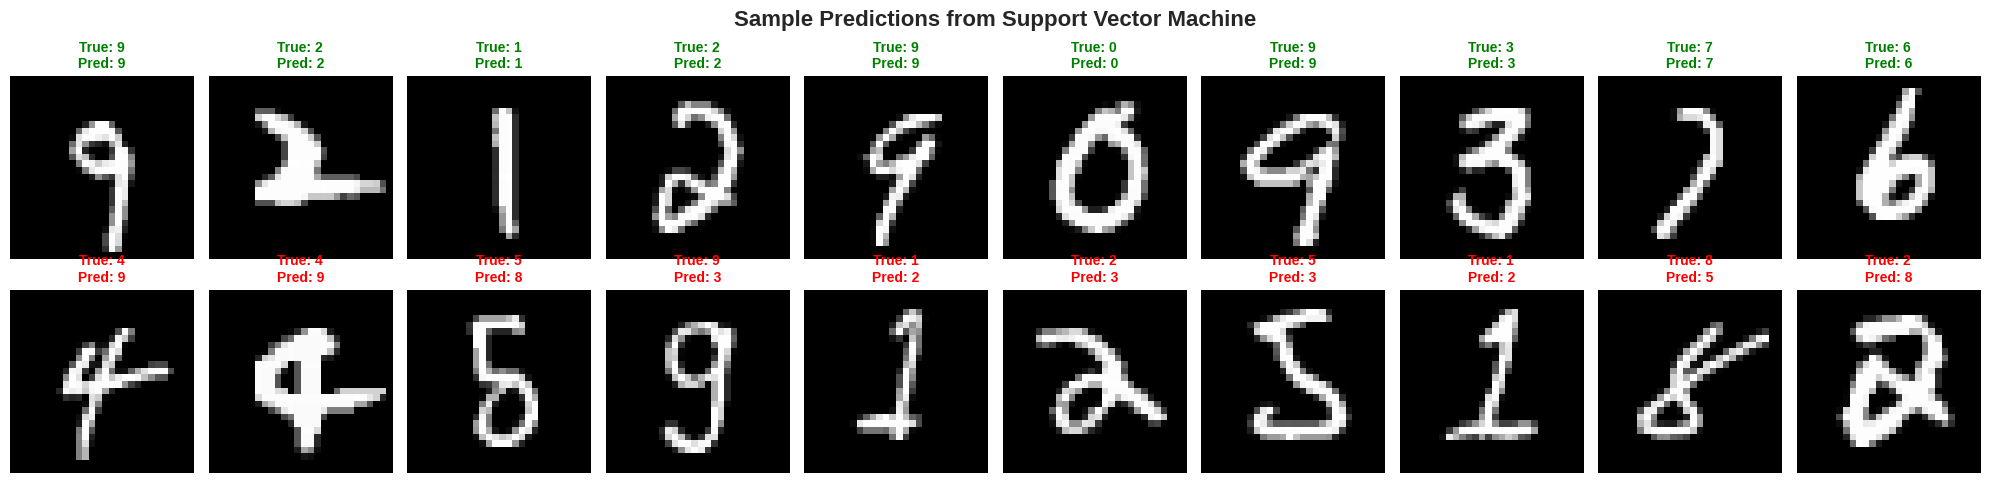

In [ ]:
# Visualize some correct and incorrect predictions
correct_indices = np.where(y_pred_best == y_test)[0][:10]
incorrect_indices = np.where(y_pred_best != y_test)[0][:10]

fig, axes = plt.subplots(2, 10, figsize=(20, 5))

# Correct predictions
for i, idx in enumerate(correct_indices):
    image = X_test[idx].reshape(28, 28)
    axes[0, i].imshow(image, cmap='gray')
    axes[0, i].set_title(f'True: {y_test[idx]}\nPred: {y_pred_best[idx]}',
                        fontsize=10, color='green', fontweight='bold')
    axes[0, i].axis('off')

# Incorrect predictions
for i, idx in enumerate(incorrect_indices):
    image = X_test[idx].reshape(28, 28)
    axes[1, i].imshow(image, cmap='gray')
    axes[1, i].set_title(f'True: {y_test[idx]}\nPred: {y_pred_best[idx]}',
                        fontsize=10, color='red', fontweight='bold')
    axes[1, i].axis('off')

axes[0, 0].set_ylabel('Correct\nPredictions', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Incorrect\nPredictions', fontsize=14, fontweight='bold')

plt.suptitle(f'Sample Predictions from {best_model_name}', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

---
## Final Recommendations and Production Model
---

### Model Selection for Production

In [ ]:
print("="*80)
print("PRODUCTION MODEL RECOMMENDATION")
print("="*80)

print(f"\n🏆 RECOMMENDED MODEL: {best_model_name}")
print(f"\n📊 Key Performance Metrics:")
print(f"   - Accuracy:  {results_df.loc[best_model_idx, 'Accuracy']*100:.2f}%")
print(f"   - Precision: {results_df.loc[best_model_idx, 'Precision']*100:.2f}%")
print(f"   - Recall:    {results_df.loc[best_model_idx, 'Recall']*100:.2f}%")
print(f"   - F1-Score:  {results_df.loc[best_model_idx, 'F1-Score']*100:.2f}%")

print(f"\n⏱️  Performance:")
print(f"   - Training Time:    {results_df.loc[best_model_idx, 'Training Time (s)']:.2f} seconds")
print(f"   - Prediction Time:  {results_df.loc[best_model_idx, 'Prediction Time (s)']:.4f} seconds")



PRODUCTION MODEL RECOMMENDATION

🏆 RECOMMENDED MODEL: Support Vector Machine

📊 Key Performance Metrics:
   - Accuracy:  95.15%
   - Precision: 95.15%
   - Recall:    95.15%
   - F1-Score:  95.15%

⏱️  Performance:
   - Training Time:    6.77 seconds
   - Prediction Time:  6.7518 seconds


## Hyperparameter Tuning for K-Nearest Neighbors (KNN)

### Subtask:
Define a parameter grid for KNeighborsClassifier and use GridSearchCV to find the optimal hyperparameters. The best estimator and its performance will be recorded.


**Reasoning**:
The subtask requires defining a parameter grid for KNeighborsClassifier and performing GridSearchCV. I will start by defining the parameter grid for `n_neighbors` and `weights`.



In [ ]:
from sklearn.model_selection import GridSearchCV

print("Starting Hyperparameter Tuning for KNeighborsClassifier...")

# 1. Define a dictionary named knn_param_grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

print("Defined KNN parameter grid:")
for param, values in knn_param_grid.items():
    print(f"  {param}: {values}")


Starting Hyperparameter Tuning for KNeighborsClassifier...
Defined KNN parameter grid:
  n_neighbors: [3, 5, 7, 9]
  weights: ['uniform', 'distance']


**Reasoning**:
Now that the parameter grid for KNN is defined, the next step is to initialize and fit `GridSearchCV` to find the optimal hyperparameters for `KNeighborsClassifier`.



In [ ]:
print("Initializing and fitting GridSearchCV for KNeighborsClassifier...")

# 2. Initialize GridSearchCV
knn_grid_search = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1 # Use all available cores
)

# 3. Fit the GridSearchCV object to the training data
start_time_grid_fit = time.time()
knn_grid_search.fit(X_train_scaled, y_train)
end_time_grid_fit = time.time()
training_time_grid_search = end_time_grid_fit - start_time_grid_fit

print("GridSearchCV fitting complete.")

# 4. Print the best parameters
print(f"\nBest parameters found for KNN: {knn_grid_search.best_params_}")

# 5. Print the best cross-validation score
print(f"Best cross-validation accuracy for KNN: {knn_grid_search.best_score_:.4f}")

# 6. Store the best KNN estimator
best_knn_model = knn_grid_search.best_estimator_
print("Best KNN model stored.")

Initializing and fitting GridSearchCV for KNeighborsClassifier...
GridSearchCV fitting complete.

Best parameters found for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy for KNN: 0.9364
Best KNN model stored.


**Reasoning**:
With the best KNN estimator identified, the next step is to make predictions on the test set, evaluate its performance, and store these metrics for comparison with other models, as per instructions 7 and 8.



In [ ]:
print("Evaluating best KNN model on the test set...")

# 7. Make predictions on the scaled test data and record prediction time
start_time_prediction = time.time()
y_pred_knn = best_knn_model.predict(X_test_scaled)
prediction_time_knn = time.time() - start_time_prediction

# 8. Calculate and record evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

# For training time, we consider the GridSearchCV fit time which includes training multiple models
# However, for a single 'best_knn_model', we can re-train it or use the best_score_ (cross-validation accuracy)
# For simplicity, we'll record the overall GridSearchCV training time.
# If a specific training time for the best estimator is needed, it would require re-training it separately.

# Store results in a dictionary
kNN_tuned_results = {
    'Model': 'K-Nearest Neighbors (Tuned)',
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn,
    'Training Time (s)': training_time_grid_search, # Total GridSearchCV fit time
    'Prediction Time (s)': prediction_time_knn
}

print(f"\n✅ Evaluation of Tuned KNN completed:")
print(f"   - Accuracy:  {accuracy_knn*100:.2f}%")
print(f"   - Precision: {precision_knn*100:.2f}%")
print(f"   - Recall:    {recall_knn*100:.2f}%")
print(f"   - F1-Score:  {f1_knn*100:.2f}%")
print(f"   - Total GridSearchCV Training Time: {training_time_grid_search:.2f} seconds")
print(f"   - Prediction Time: {prediction_time_knn:.4f} seconds")

Evaluating best KNN model on the test set...

✅ Evaluation of Tuned KNN completed:
   - Accuracy:  94.35%
   - Precision: 94.41%
   - Recall:    94.35%
   - F1-Score:  94.33%
   - Total GridSearchCV Training Time: 29.91 seconds
   - Prediction Time: 0.9811 seconds


## Hyperparameter Tuning for Support Vector Machine (SVC)

### Subtask:
Define a parameter grid for SVC and apply GridSearchCV to identify the best hyperparameters. Given the computational cost, a smaller grid will be used for efficiency.


**Reasoning**:
The subtask requires defining a parameter grid for SVC. I will start by defining the parameter grid for `C` and `kernel` as specified.



In [ ]:
print("Starting Hyperparameter Tuning for Support Vector Machine (SVC)...")

# 1. Define a dictionary named svc_param_grid
svc_param_grid = {
    'C': [0.1, 1],
    'kernel': ['rbf', 'linear']
}

print("Defined SVC parameter grid:")
for param, values in svc_param_grid.items():
    print(f"  {param}: {values}")

Starting Hyperparameter Tuning for Support Vector Machine (SVC)...
Defined SVC parameter grid:
  C: [0.1, 1]
  kernel: ['rbf', 'linear']


**Reasoning**:
Now that the parameter grid for SVC is defined, the next step is to initialize and fit `GridSearchCV` to find the optimal hyperparameters, as per instructions 2, 3, 4, 5, and 6.



In [ ]:
print("Initializing and fitting GridSearchCV for SVC...")

# 2. Initialize GridSearchCV
svc_grid_search = GridSearchCV(
    SVC(gamma='scale', random_state=42), # Keep gamma='scale' as a good default or add to grid
    svc_param_grid,
    cv=3, # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1 # Use all available cores
)

# 3. Fit the GridSearchCV object to the training data
start_time_svc_grid_fit = time.time()
svc_grid_search.fit(X_train_scaled, y_train)
end_time_svc_grid_fit = time.time()
training_time_svc_grid_search = end_time_svc_grid_fit - start_time_svc_grid_fit

print("GridSearchCV fitting complete.")

# 4. Print the best parameters
print(f"\nBest parameters found for SVC: {svc_grid_search.best_params_}")

# 5. Print the best cross-validation score
print(f"Best cross-validation accuracy for SVC: {svc_grid_search.best_score_:.4f}")

# 6. Store the best SVC estimator
best_svc_model = svc_grid_search.best_estimator_
print("Best SVC model stored.")

Initializing and fitting GridSearchCV for SVC...
GridSearchCV fitting complete.

Best parameters found for SVC: {'C': 1, 'kernel': 'rbf'}
Best cross-validation accuracy for SVC: 0.9516
Best SVC model stored.


**Reasoning**:
With the best SVC estimator identified, the next step is to make predictions on the test set, evaluate its performance, and store these metrics for comparison with other models, as per instructions 7, 8, 9, and 10.



In [ ]:
print("Evaluating best SVC model on the test set...")

# 7. Make predictions on the scaled test data and record prediction time
start_time_prediction_svc = time.time()
y_pred_svc = best_svc_model.predict(X_test_scaled)
prediction_time_svc = time.time() - start_time_prediction_svc

# 8. Calculate and record evaluation metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted', zero_division=0)
recall_svc = recall_score(y_test, y_pred_svc, average='weighted', zero_division=0)
f1_svc = f1_score(y_test, y_pred_svc, average='weighted', zero_division=0)

# 9. Store the results in a dictionary
svc_tuned_results = {
    'Model': 'Support Vector Machine (Tuned)',
    'Accuracy': accuracy_svc,
    'Precision': precision_svc,
    'Recall': recall_svc,
    'F1-Score': f1_svc,
    'Training Time (s)': training_time_svc_grid_search, # Total GridSearchCV fit time
    'Prediction Time (s)': prediction_time_svc
}

print(f"\n✅ Evaluation of Tuned SVC completed:")
print(f"   - Accuracy:  {accuracy_svc*100:.2f}%")
print(f"   - Precision: {precision_svc*100:.2f}%")
print(f"   - Recall:    {recall_svc*100:.2f}%")
print(f"   - F1-Score:  {f1_svc*100:.2f}%")
print(f"   - Total GridSearchCV Training Time: {training_time_svc_grid_search:.2f} seconds")
print(f"   - Prediction Time: {prediction_time_svc:.4f} seconds")

Evaluating best SVC model on the test set...

✅ Evaluation of Tuned SVC completed:
   - Accuracy:  95.15%
   - Precision: 95.15%
   - Recall:    95.15%
   - F1-Score:  95.15%
   - Total GridSearchCV Training Time: 101.75 seconds
   - Prediction Time: 5.9665 seconds


## Hyperparameter Tuning for Multi-layer Perceptron (MLP)

### Subtask:
Define a parameter grid for MLPClassifier and utilize GridSearchCV to determine the most effective hyperparameters.


**Reasoning**:
I need to define the parameter grid for the MLPClassifier as specified in instruction 1, then initialize GridSearchCV with this grid and an MLPClassifier instance as per instruction 2.



In [ ]:
print("Starting Hyperparameter Tuning for Multi-layer Perceptron (MLP)...")

# 1. Define a dictionary named mlp_param_grid
mlp_param_grid = {
    'hidden_layer_sizes': [(128, 64), (64,)],
    'max_iter': [50, 100]
}

print("Defined MLP parameter grid:")
for param, values in mlp_param_grid.items():
    print(f"  {param}: {values}")

print("Initializing GridSearchCV for MLPClassifier...")

# 2. Initialize GridSearchCV
mlp_grid_search = GridSearchCV(
    MLPClassifier(random_state=42, early_stopping=True), # Use early_stopping as default
    mlp_param_grid,
    cv=3, # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1 # Use all available cores
)

print("GridSearchCV initialized.")

Starting Hyperparameter Tuning for Multi-layer Perceptron (MLP)...
Defined MLP parameter grid:
  hidden_layer_sizes: [(128, 64), (64,)]
  max_iter: [50, 100]
Initializing GridSearchCV for MLPClassifier...
GridSearchCV initialized.


**Reasoning**:
Now that the parameter grid for MLP is defined and `GridSearchCV` is initialized, the next step is to fit the `GridSearchCV` object to the training data, as per instruction 3.



In [ ]:
print("Fitting GridSearchCV for MLPClassifier...")

# 3. Fit the GridSearchCV object to the training data
start_time_mlp_grid_fit = time.time()
mlp_grid_search.fit(X_train_scaled, y_train)
end_time_mlp_grid_fit = time.time()
training_time_mlp_grid_search = end_time_mlp_grid_fit - start_time_mlp_grid_fit

print("GridSearchCV fitting complete.")

# 4. Print the best parameters
print(f"\nBest parameters found for MLP: {mlp_grid_search.best_params_}")

# 5. Print the best cross-validation score
print(f"Best cross-validation accuracy for MLP: {mlp_grid_search.best_score_:.4f}")

# 6. Store the best MLP estimator
best_mlp_model = mlp_grid_search.best_estimator_
print("Best MLP model stored.")

Fitting GridSearchCV for MLPClassifier...
GridSearchCV fitting complete.

Best parameters found for MLP: {'hidden_layer_sizes': (128, 64), 'max_iter': 50}
Best cross-validation accuracy for MLP: 0.9341
Best MLP model stored.


**Reasoning**:
With the best MLP estimator identified, the next step is to make predictions on the test set, evaluate its performance, and store these metrics for comparison with other models, as per instructions 7, 8, and 9.



In [ ]:
print("Evaluating best MLP model on the test set...")

# 7. Make predictions on the scaled test data and record prediction time
start_time_prediction_mlp = time.time()
y_pred_mlp = best_mlp_model.predict(X_test_scaled)
prediction_time_mlp = time.time() - start_time_prediction_mlp

# 8. Calculate and record evaluation metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted', zero_division=0)
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted', zero_division=0)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted', zero_division=0)

# 9. Store the results in a dictionary
mlp_tuned_results = {
    'Model': 'Neural Network (MLP) (Tuned)',
    'Accuracy': accuracy_mlp,
    'Precision': precision_mlp,
    'Recall': recall_mlp,
    'F1-Score': f1_mlp,
    'Training Time (s)': training_time_mlp_grid_search, # Total GridSearchCV fit time
    'Prediction Time (s)': prediction_time_mlp
}

print(f"\n✅ Evaluation of Tuned MLP completed:")
print(f"   - Accuracy:  {accuracy_mlp*100:.2f}%")
print(f"   - Precision: {precision_mlp*100:.2f}%")
print(f"   - Recall:    {recall_mlp*100:.2f}%")
print(f"   - F1-Score:  {f1_mlp*100:.2f}%")
print(f"   - Total GridSearchCV Training Time: {training_time_mlp_grid_search:.2f} seconds")
print(f"   - Prediction Time: {prediction_time_mlp:.4f} seconds")

Evaluating best MLP model on the test set...

✅ Evaluation of Tuned MLP completed:
   - Accuracy:  94.55%
   - Precision: 94.61%
   - Recall:    94.55%
   - F1-Score:  94.56%
   - Total GridSearchCV Training Time: 37.79 seconds
   - Prediction Time: 0.0141 seconds


## Consolidate and Evaluate Tuned Models

Collect the best estimators from each hyperparameter tuning process, re-evaluate their performance on the test set using standard metrics, and update the results for comparison.


**Reasoning**:
The next step is to consolidate all model results (both untuned and tuned) into a single list, then convert this list into a Pandas DataFrame for comprehensive comparison, ensuring all columns are displayed and values are rounded as requested.



In [ ]:
print("Consolidating tuned and untuned model results...")

# Create a list of tuned model results
tuned_results_list = [kNN_tuned_results, svc_tuned_results, mlp_tuned_results]

# Append tuned model results to the existing 'results' list
# Make a copy to avoid modifying the original 'results' list if it's used elsewhere
all_results = results.copy() # 'results' is from the initial model training
all_results.extend(tuned_results_list)

# Convert the combined results list into a Pandas DataFrame
comparison_df = pd.DataFrame(all_results)

# Round numerical columns to 4 decimal places for readability
comparison_df = comparison_df.round(4)

print("\n" + "="*80)
print("CONSOLIDATED MODEL COMPARISON SUMMARY (Untuned & Tuned)")
print("="*80 + "\n")

# Print the DataFrame, ensuring all columns are visible
pd.set_option('display.max_columns', None)
print(comparison_df.to_string(index=False))

pd.reset_option('display.max_columns') # Reset to default after printing

Consolidating tuned and untuned model results...

CONSOLIDATED MODEL COMPARISON SUMMARY (Untuned & Tuned)

                         Model  Accuracy  Precision  Recall  F1-Score  Training Time (s)  Prediction Time (s)
           K-Nearest Neighbors    0.9400     0.9409  0.9400    0.9396             0.0057               0.9805
        Support Vector Machine    0.9515     0.9515  0.9515    0.9515             6.7696               6.7518
                 Decision Tree    0.7835     0.7836  0.7835    0.7831             2.1159               0.0028
                 Random Forest    0.9375     0.9374  0.9375    0.9373             6.1652               0.0790
           Logistic Regression    0.8970     0.8970  0.8970    0.8967            12.2734               0.0126
                   Naive Bayes    0.6015     0.6937  0.6015    0.5720             0.0955               0.0955
          Neural Network (MLP)    0.9455     0.9461  0.9455    0.9456             7.5118               0.0116
   K-Nearest 